In [1]:
ce_loss_acc_path   = '../results/Crossentropy_Resnet18_loss_acc.csv'
edl_loss_acc_path  = '../results/Evidential_Resnet18_loss_acc.csv'
ce_entropy_path    = '../results/Crossentropy_Resnet18_entropy.csv'
ce_q_entropy_path  = '../results/Crossentropy_Resnet18_quant_entropy.csv'
edl_entropy_path   = '../results/Evidential_Resnet18_entropy.csv'
edl_q_entropy_path = '../results/Evidential_Resnet18_quant_entropy.csv'
ce_metrics_path    = '../results/Crossentropy_Resnet18_metrics.csv'
ce_q_metrics_path  = '../results/Crossentropy_Resnet18_quant_metrics.csv'
edl_metrics_path   = '../results/Evidential_Resnet18_metrics.csv'
edl_q_metrics_path = '../results/Evidential_Resnet18_quant_metrics.csv'

file_ext = ' CIFAR10.png'
save_pth = '../results/CIFAR10/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [3]:
df = pd.read_csv(ce_loss_acc_path)
epoch_no = df['epoch_no']
ce_train_loss = df['train_loss']
ce_val_loss = df['val_loss']
ce_train_acc = df['train_acc']
ce_val_acc = df['val_acc']


df1 = pd.read_csv(edl_loss_acc_path)
edl_train_loss = df1['train_loss']
edl_val_loss = df1['val_loss']
edl_train_acc = df1['train_acc']
edl_val_acc = df1['val_acc']

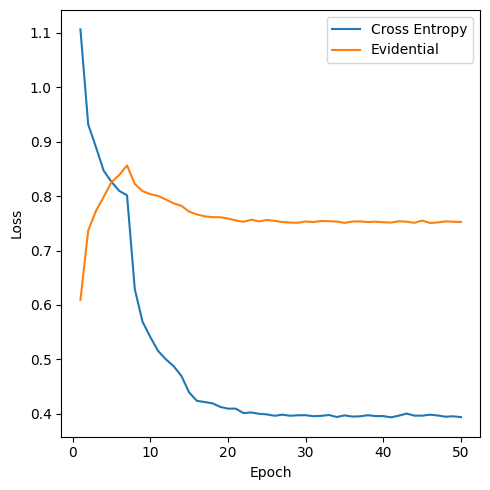

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(epoch_no, ce_train_loss, label="Cross Entropy")
ax.plot(epoch_no, edl_train_loss, label="Evidential")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
#ax.set_title('Training loss')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig(save_pth+'TrainingLoss'+file_ext)

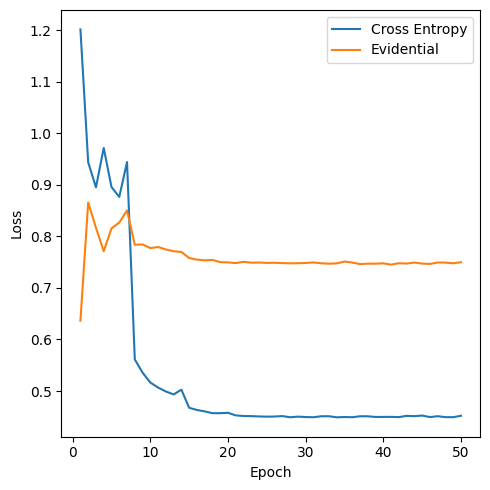

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(epoch_no, ce_val_loss, label="Cross Entropy")
ax.plot(epoch_no, edl_val_loss, label="Evidential")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
#ax.set_title('Validation loss')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig(save_pth+'ValidationLoss'+file_ext)

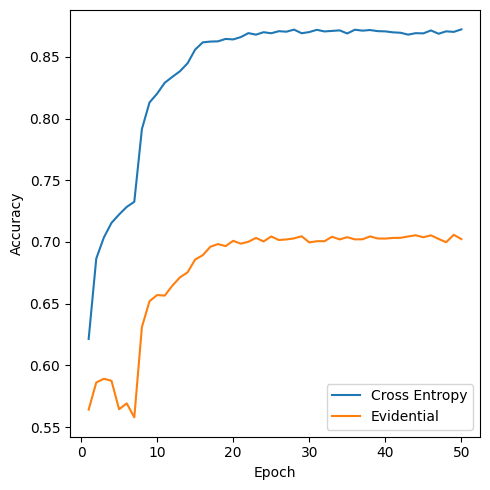

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(epoch_no, ce_train_acc, label="Cross Entropy")
ax.plot(epoch_no, edl_train_acc, label="Evidential")
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
#ax.set_title('Training accuracy')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig(save_pth+'TrainingAccuracy'+file_ext)

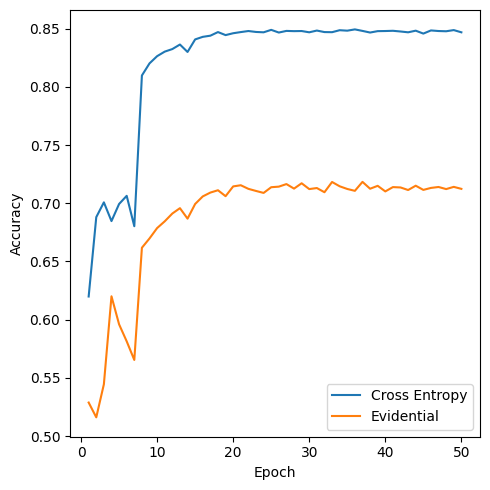

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(epoch_no, ce_val_acc, label="Cross Entropy")
ax.plot(epoch_no, edl_val_acc, label="Evidential")
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
#ax.set_title('Validation accuracy')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig(save_pth+'ValidationAccuracy'+file_ext)

In [8]:
def plot_methods(methods, file_name):
    X = ['CE', 'CE-Q', 'EDL', 'EDL-Q']
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(X, methods)
    ax.get_xticklabels()
    plt.ylabel("Score")
    plt.show()
    fig.savefig(save_pth+file_name+file_ext)

In [9]:
def box_plot(data, file_name, y_label='score'):
    X = ['CE', 'CE-Q', 'EDL', 'EDL-Q']
    fig, ax = plt.subplots(figsize=(5, 5))
    bp = ax.boxplot(data, patch_artist=True)    
    edge_color='blue'
    fill_color='cyan'
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)   
    ax.set_xticklabels(X)
    plt.ylabel(y_label)
    plt.show()
    fig.savefig(save_pth+file_name+file_ext)

# Classification Metrics

In [10]:
df1 = pd.read_csv(ce_metrics_path)
df2 = pd.read_csv(ce_q_metrics_path)
df3 = pd.read_csv(edl_metrics_path)
df4 = pd.read_csv(edl_q_metrics_path)

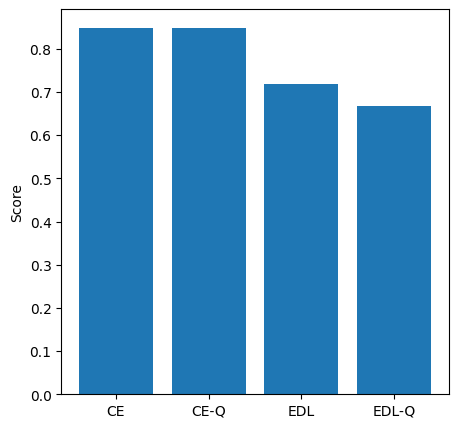

In [11]:
ce = df1.iloc[0]['accuracy']
ce_q = df2.iloc[0]['accuracy']
edl = df3.iloc[0]['accuracy']
edl_q = df4.iloc[0]['accuracy']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceAccuracy'
plot_methods(methods, file_name)

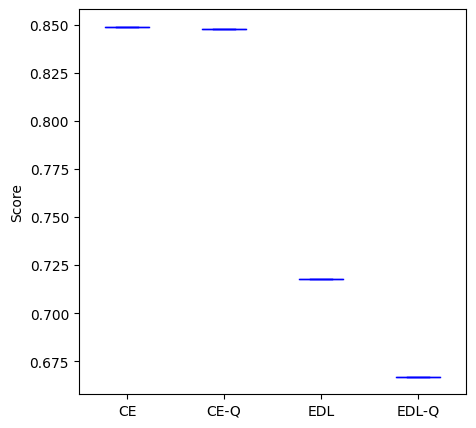

In [12]:
ce = df1['accuracy']
ce_q = df2['accuracy']
edl = df3['accuracy']
edl_q = df4['accuracy']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceAccuracy'
y_label = "Score"
box_plot(methods, file_name, y_label)

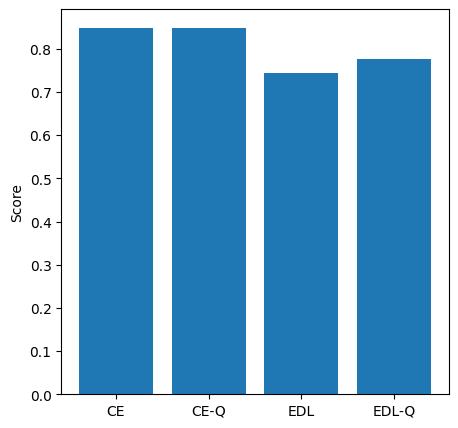

In [13]:
ce = df1.iloc[0]['precision']
ce_q = df2.iloc[0]['precision']
edl = df3.iloc[0]['precision']
edl_q = df4.iloc[0]['precision']

methods = [ce, ce_q, edl, edl_q]
file_name='InferencePrecision'
plot_methods(methods, file_name)

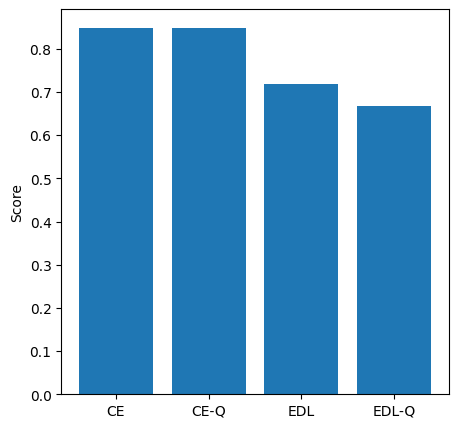

In [14]:
ce = df1.iloc[0]['recall_score']
ce_q = df2.iloc[0]['recall_score']
edl = df3.iloc[0]['recall_score']
edl_q = df4.iloc[0]['recall_score']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceRecall'
plot_methods(methods, file_name)

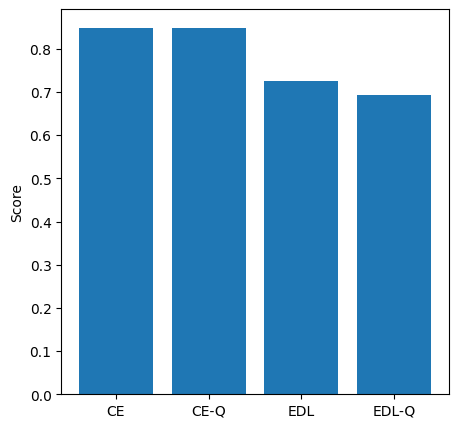

In [15]:
ce = df1.iloc[0]['f1score']
ce_q = df2.iloc[0]['f1score']
edl = df3.iloc[0]['f1score']
edl_q = df4.iloc[0]['f1score']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceF1score'
plot_methods(methods, file_name)

# Performance metrics

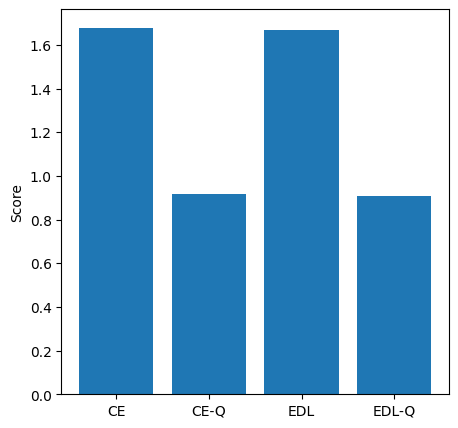

In [16]:
ce = df1.iloc[0]['inferencetime']
ce_q = df2.iloc[0]['inferencetime']
edl = df3.iloc[0]['inferencetime']
edl_q = df4.iloc[0]['inferencetime']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceTime'
plot_methods(methods, file_name)

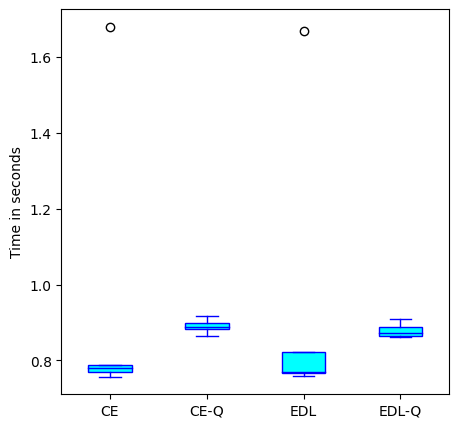

In [17]:
ce = df1['inferencetime']
ce_q = df2['inferencetime']
edl = df3['inferencetime']
edl_q = df4['inferencetime']

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceTime'
y_label = "Time in seconds"
box_plot(methods, file_name, y_label)

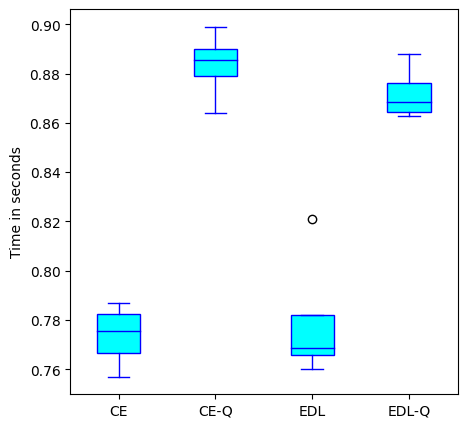

In [18]:
ce = df1['inferencetime'][1:]
ce_q = df2['inferencetime'][1:]
edl = df3['inferencetime'][1:]
edl_q = df4['inferencetime'][1:]

methods = [ce, ce_q, edl, edl_q]
file_name='InferenceTime'
y_label = "Time in seconds"
box_plot(methods, file_name, y_label)

# Uncertainty Metrics

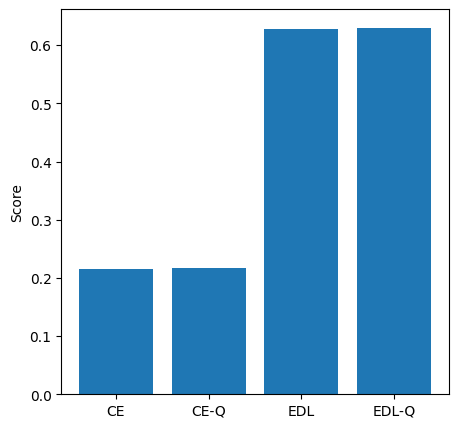

In [19]:
ce = df1.iloc[0]['brierscore']
ce_q = df2.iloc[0]['brierscore']
edl = df3.iloc[0]['brierscore']
edl_q = df4.iloc[0]['brierscore']

methods = [ce, ce_q, edl, edl_q]
file_name='BrierScore'
plot_methods(methods, file_name)

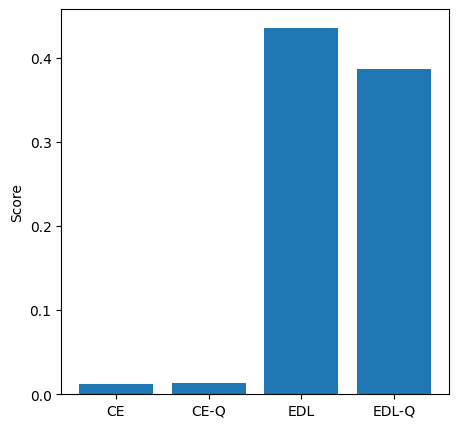

In [20]:
ce = df1.iloc[0]['expectedcalibrationerror']
ce_q = df2.iloc[0]['expectedcalibrationerror']
edl = df3.iloc[0]['expectedcalibrationerror']
edl_q = df4.iloc[0]['expectedcalibrationerror']

methods = [ce, ce_q, edl, edl_q]
file_name='CalibrationError'
plot_methods(methods, file_name)

In [21]:
df1 = pd.read_csv(ce_entropy_path)
df2 = pd.read_csv(ce_q_entropy_path)
df3 = pd.read_csv(edl_entropy_path)
df4 = pd.read_csv(edl_q_entropy_path)

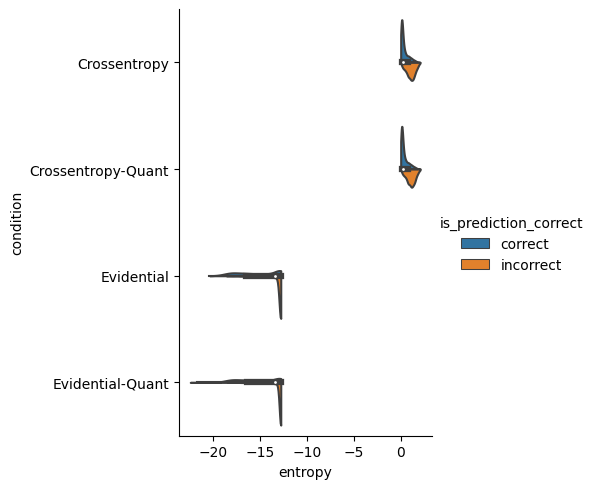

In [22]:
d = {True: 'correct', False: 'incorrect'}
df1['is_prediction_correct'] = df1['is_prediction_correct'].replace(d)
df2['is_prediction_correct'] = df2['is_prediction_correct'].replace(d)
df3['is_prediction_correct'] = df3['is_prediction_correct'].replace(d)
df4['is_prediction_correct'] = df4['is_prediction_correct'].replace(d)

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

g = sns.catplot(data=df, hue="is_prediction_correct", x="entropy", y="condition", kind="violin", bw=.25, cut=0, split=True)
plt.savefig(save_pth+'Entropy'+file_ext)

In [23]:
# d = {True: 'correct', False: 'incorrect'}
# df1['is_prediction_correct'] = df1['is_prediction_correct'].replace(d)
# df2['is_prediction_correct'] = df2['is_prediction_correct'].replace(d)
# df3['is_prediction_correct'] = df3['is_prediction_correct'].replace(d)
# df4['is_prediction_correct'] = df4['is_prediction_correct'].replace(d)

# df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# g = sns.catplot(data=df, hue="is_prediction_correct", x="entropy", y="condition", kind="violin", bw=.25, cut=0, split=True)
# plt.savefig(save_pth+'Entropy'+file_ext)

In [24]:
#g = sns.catplot(data=df, hue="is_prediction_correct", x="entropy", y="condition", kind="boxen")